In [2]:
def run_mean_reversion_strategy(self, SMA, threshold):
    '''Backtesting a mean reversion-based strategy.
    
    Parameters
    ==========
    SMA: int
       simple moving average in days
    threshokd: float
       absolute value for deviation-based signal relative to SMA
    '''
    
    msg = f'\n\nRunning mean reversion strategy | '
    msg += f'SMA={SMA} & thr={threshold}'
    msg += f'\nfixed costs {self.ftc} | '
    msg += f'proportional costs {self.ptc}'
    print(msg)
    print('=' * 55)
    self.position = 0
    self.trades = 0
    self.amount = self.initial_amount
    
    self.data['SMA'] = self.data['price'].rolling(SMA).mean()
    
    for bar in range(SMA, len(self.data)):
        if self.position == 0:
            if(self.data['price'].iloc[bar] <
               self.data['SMA'].iloc[bar] - threshold):
                self.place_buy_order(bar, amount=self.amount)
                self.position = 1
        elif self.position == 1:
            if self.data['price'].iloc[bar] >= self.data['SMA'].iloc[bar]:
                self.place_sell_order(bar, units=self.units)
                self.position = 0
    self.close_out(bar)
    
                                                                                                                                                                                             
    

In [9]:
import pandas as pd

# ① 先頭2行をスキップして読み込む
data = pd.read_csv('tr_eikon_eod_data.csv', skiprows=2, header=None)

# ② 列名をつける
data.columns = ['Date', 'price']

# ③ Date列を日付に変換
data['Date'] = pd.to_datetime(data['Date'])

# ④ Dateをindexにする
data = data.set_index('Date')

print(data.head())


# --------------------
# Backtest クラス
# --------------------
class BacktestBase:
    def __init__(self, data, initial_amount=10000):
        self.data = data
        self.initial_amount = initial_amount
        self.position = 0
        self.trades = 0
        self.amount = initial_amount
        self.ftc = 0.0
        self.ptc = 0.0
        self.units = 0

    def place_buy_order(self, bar, amount):
        price = self.data['price'].iloc[bar]
        self.units = amount / price
        self.trades += 1
        print(f"BUY at {price:.2f}, units={self.units:.4f}")

    def place_sell_order(self, bar, units):
        price = self.data['price'].iloc[bar]
        self.amount = units * price
        self.trades += 1
        print(f"SELL at {price:.2f}, profit={self.amount:.2f}")

    def close_out(self, bar):
        if self.position == 1:
            self.place_sell_order(bar, self.units)

    def run_mean_reversion_strategy(self, SMA, threshold):
        msg = f'\n\nRunning mean reversion strategy | SMA={SMA} & thr={threshold}'
        msg += f'\nfixed costs {self.ftc} | proportional costs {self.ptc}'
        print(msg)
        print('=' * 55)

        self.position = 0
        self.trades = 0
        self.amount = self.initial_amount

        self.data['SMA'] = self.data['price'].rolling(SMA).mean()

        for bar in range(SMA, len(self.data)):
            if self.position == 0:
                if self.data['price'].iloc[bar] < self.data['SMA'].iloc[bar] - threshold:
                    self.place_buy_order(bar, amount=self.amount)
                    self.position = 1

            elif self.position == 1:
                if self.data['price'].iloc[bar] >= self.data['SMA'].iloc[bar]:
                    self.place_sell_order(bar, units=self.units)
                    self.position = 0

        self.close_out(bar)

# --------------------
# 実行
# --------------------
bb = BacktestBase(data, initial_amount=10000)
bb.run_mean_reversion_strategy(SMA=20, threshold=1.0)


C:\Users\Ryouh\AppData\Local\Temp\ipykernel_22396\1343878732.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


DateParseError: Unknown datetime string format, unable to parse: Date, at position 0

In [ ]:
#完成版↓



Running mean reversion strategy | SMA=20 & thr=1.0
fixed costs 0.0 | proportional costs 0.0
BUY at 17.18, units=581.9275
SELL at 18.29, profit=10646.10
BUY at 15.90, units=669.6142
SELL at 17.11, profit=11458.23
BUY at 19.22, units=596.1137
SELL at 17.29, profit=10308.05
BUY at 15.42, units=668.2729
SELL at 16.10, profit=10760.58
BUY at 14.70, units=731.8793
SELL at 14.46, profit=10579.61
BUY at 12.78, units=827.5873
SELL at 13.50, profit=11174.27
BUY at 12.26, units=911.5377
SELL at 13.09, profit=11932.17
BUY at 12.33, units=967.5870
SELL at 12.89, profit=12473.44
BUY at 13.88, units=898.6269
SELL at 15.13, profit=13596.30
BUY at 15.71, units=865.4355
SELL at 16.51, profit=14285.02
BUY at 24.33, units=587.2271
SELL at 25.27, profit=14839.60
BUY at 23.55, units=630.0048
SELL at 24.81, profit=15627.32
BUY at 27.21, units=574.3957
SELL at 28.59, profit=16423.77
BUY at 26.84, units=612.0234
SELL at 28.34, profit=17347.07
BUY at 26.47, units=655.3262
SELL at 25.21, profit=16523.71
BUY at

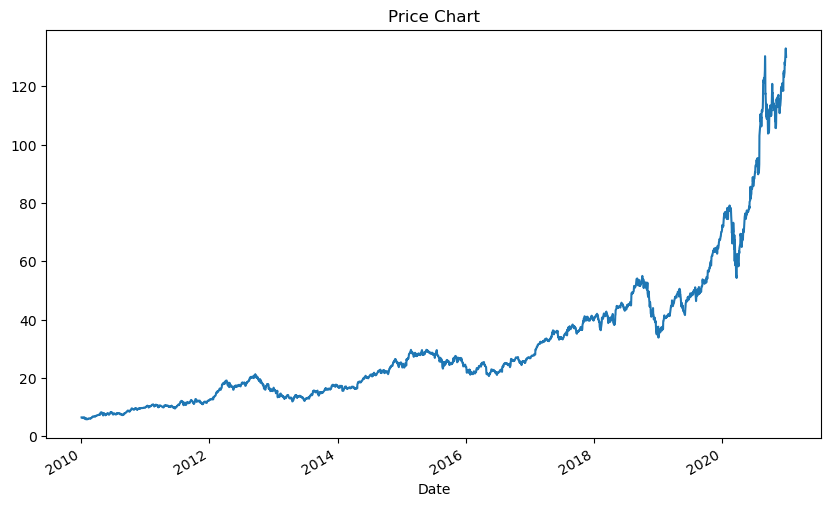

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 1. データ読み込み
# =========================
data = pd.read_csv('tr_eikon_eod_data.csv', skiprows=3, header=None)
data.columns = ['Date', 'price']
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

# =========================
# 2. バックテストクラス
# =========================
class BacktestBase:
    def __init__(self, data, initial_amount=10000):
        self.data = data
        self.initial_amount = initial_amount
        self.position = 0
        self.trades = 0
        self.amount = initial_amount
        self.ftc = 0.0
        self.ptc = 0.0
        self.units = 0

    def place_buy_order(self, bar, amount):
        price = self.data['price'].iloc[bar]
        self.units = amount / price
        self.trades += 1
        print(f"BUY at {price:.2f}, units={self.units:.4f}")

    def place_sell_order(self, bar, units):
        price = self.data['price'].iloc[bar]
        self.amount = units * price
        self.trades += 1
        print(f"SELL at {price:.2f}, profit={self.amount:.2f}")

    def close_out(self, bar):
        if self.position == 1:
            self.place_sell_order(bar, self.units)

    def run_mean_reversion_strategy(self, SMA, threshold):
        msg = f'\n\nRunning mean reversion strategy | SMA={SMA} & thr={threshold}'
        msg += f'\nfixed costs {self.ftc} | proportional costs {self.ptc}'
        print(msg)
        print('=' * 55)

        self.position = 0
        self.trades = 0
        self.amount = self.initial_amount

        self.data['SMA'] = self.data['price'].rolling(SMA).mean()

        for bar in range(SMA, len(self.data)):
            if self.position == 0:
                if self.data['price'].iloc[bar] < self.data['SMA'].iloc[bar] - threshold:
                    self.place_buy_order(bar, amount=self.amount)
                    self.position = 1

            elif self.position == 1:
                if self.data['price'].iloc[bar] >= self.data['SMA'].iloc[bar]:
                    self.place_sell_order(bar, units=self.units)
                    self.position = 0

        self.close_out(bar)

    def plot_data(self):
        self.data['price'].plot(figsize=(10,6), title="Price Chart")
        plt.show()

# =========================
# 3. 実行
# =========================
if __name__ == '__main__':
    bb = BacktestBase(data, initial_amount=10000)
    bb.run_mean_reversion_strategy(SMA=20, threshold=1.0)
    bb.plot_data()
